1. Plotting $\varepsilon_{\ell}$ vs. $y$ for each gauge with linear regression

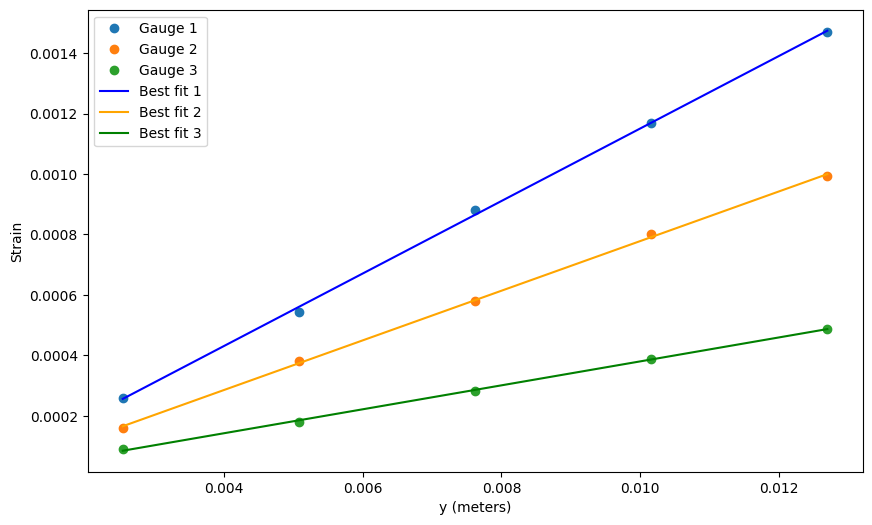

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0.1,
                0.2,
                0.3,
                0.4,
                0.5])
y = y * 0.0254 # convert to meters

# Gauge 1
strain_1 = np.array([0.00026,
                     0.000545,
                     0.00088,
                     0.00117,
                     0.00147])

# Gauge 2
strain_2 = np.array([0.00016,
                     0.00038,
                     0.00058,
                     0.000801,
                     0.000992])

# Gauge 3
strain_3 = np.array([0.000089,
                     0.000181,
                     0.000282,
                     0.000389,
                     0.000488])

# Performing linear regression and getting the slope and intercept
slope_1, intercept_1 = np.polyfit(y, strain_1, 1)
slope_2, intercept_2 = np.polyfit(y, strain_2, 1)
slope_3, intercept_3 = np.polyfit(y, strain_3, 1)

# Creating lines of best fit
best_fit_1 = slope_1 * y + intercept_1
best_fit_2 = slope_2 * y + intercept_2
best_fit_3 = slope_3 * y + intercept_3

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(y, strain_1, 'o', label='Gauge 1')
plt.plot(y, strain_2, 'o', label='Gauge 2')
plt.plot(y, strain_3, 'o', label='Gauge 3')

# Plotting lines of best fit
plt.plot(y, best_fit_1, '-', color='blue', label='Best fit 1')
plt.plot(y, best_fit_2, '-', color='orange', label='Best fit 2')
plt.plot(y, best_fit_3, '-', color='green', label='Best fit 3')

plt.xlabel('y (meters)')
plt.ylabel('Strain')
plt.legend()
plt.show()